In [130]:
import pandas as pd 
import numpy as np
import scipy.stats
import pylab 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from pmdarima.arima import auto_arima

sns.set_style("darkgrid")
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

### Import Digester 15 data

In [131]:
data15 = pd.read_csv("linearmoddataset.csv")
data15.head()

,BatchIndex,Delta,Damkohler,Sigma,CUM_Steam
0,0,-3.528878,0.067576,0.932560,25.2
1,1,-4.131134,0.071671,1.029626,26.9
2,2,-3.964852,0.073103,1.023653,27.9
3,3,-3.710638,0.079740,0.989072,28.6
4,4,-3.307759,0.077855,0.967257,25.3


<Axes: >

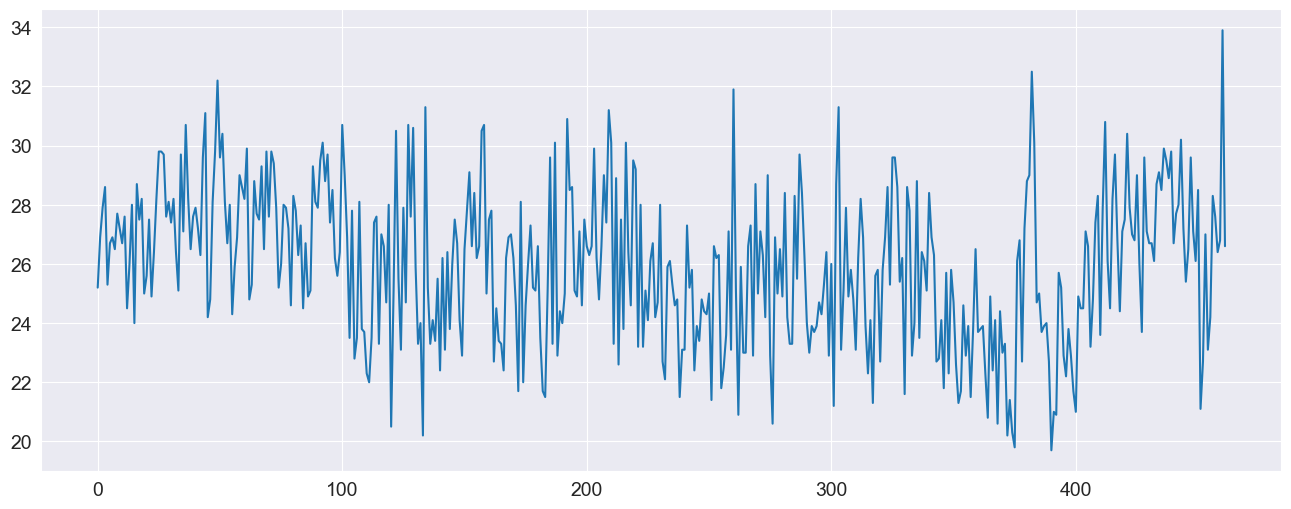

In [132]:
data15.CUM_Steam.plot()

In [133]:
# Create a range of integers representing the time axis from 0 to 500
time_axis = range(0, len(data15))  # Assuming inclusive range from 0 to 500

# Multiply each integer by 60 to convert it to minutes
minutes = [t * 60 for t in time_axis]

# Convert the minutes to datetime format with 1-minute frequency
time_index = pd.date_range(start='2023-01-01', periods=len(minutes), freq='T')

# Assign the datetime index to the DataFrame
data15.index = time_index

# Drop the existing 'time' column
data15.drop(columns=['BatchIndex'], inplace=True)

# Rename the index to 'time'
data15.index.name = 'Time'

# Drop the existing 'Time' column if needed
data15_comp = data15.copy()

In [134]:
data15.head()

,Delta,Damkohler,Sigma,CUM_Steam
Time,,,,
2023-01-01 00:00:00,-3.528878,0.067576,0.932560,25.2
2023-01-01 00:01:00,-4.131134,0.071671,1.029626,26.9
2023-01-01 00:02:00,-3.964852,0.073103,1.023653,27.9
2023-01-01 00:03:00,-3.710638,0.079740,0.989072,28.6
2023-01-01 00:04:00,-3.307759,0.077855,0.967257,25.3


In [135]:
data15_train = data15[:416]
data15_test = data15[416:]

In [136]:
data15_train.tail()

,Delta,Damkohler,Sigma,CUM_Steam
Time,,,,
2023-01-01 06:51:00,-0.021616,0.416164,1.017201,27.9
2023-01-01 06:52:00,-12.215373,0.048231,1.197968,30.8
2023-01-01 06:53:00,-5.959367,0.059172,1.009257,26.1
2023-01-01 06:54:00,-2.450689,0.085185,0.834601,24.5
2023-01-01 06:55:00,-0.086816,0.423440,1.032725,28.2


In [137]:
data15_test.head

<bound method NDFrame.head of                          Delta  Damkohler     Sigma  CUM_Steam
Time                                                          
2023-01-01 06:56:00  -5.034012   0.053259  0.951711       29.7
2023-01-01 06:57:00  -4.739834   0.056852  0.917188       26.8
2023-01-01 06:58:00  -5.168605   0.056303  0.921050       24.4
2023-01-01 06:59:00  -5.803137   0.055113  0.996934       27.1
2023-01-01 07:00:00  -5.162786   0.064888  1.008084       27.5
2023-01-01 07:01:00  -4.206190   0.070673  1.010822       30.4
2023-01-01 07:02:00  -2.762567   0.110648  0.953408       27.9
2023-01-01 07:03:00  -4.409840   0.072730  0.990977       27.0
2023-01-01 07:04:00  -6.259200   0.061253  1.044776       26.8
2023-01-01 07:05:00  -4.123903   0.060108  0.938327       29.0
2023-01-01 07:06:00  -5.143986   0.054337  0.939801       26.0
2023-01-01 07:07:00  -3.126289   0.069968  0.840544       23.7
2023-01-01 07:08:00  -4.800748   0.064921  1.095741       29.6
2023-01-01 07:09:00  -3.2

### Stationarity

In [138]:
sts.adfuller(data15_comp.CUM_Steam)

(-4.63047429718675,
 0.0001134554550077056,
 6,
 455,
 {'1%': -3.4448040131772584,
  '5%': -2.8679131843980197,
  '10%': -2.5701646673107112},
 2033.4817289174227)

### ACF

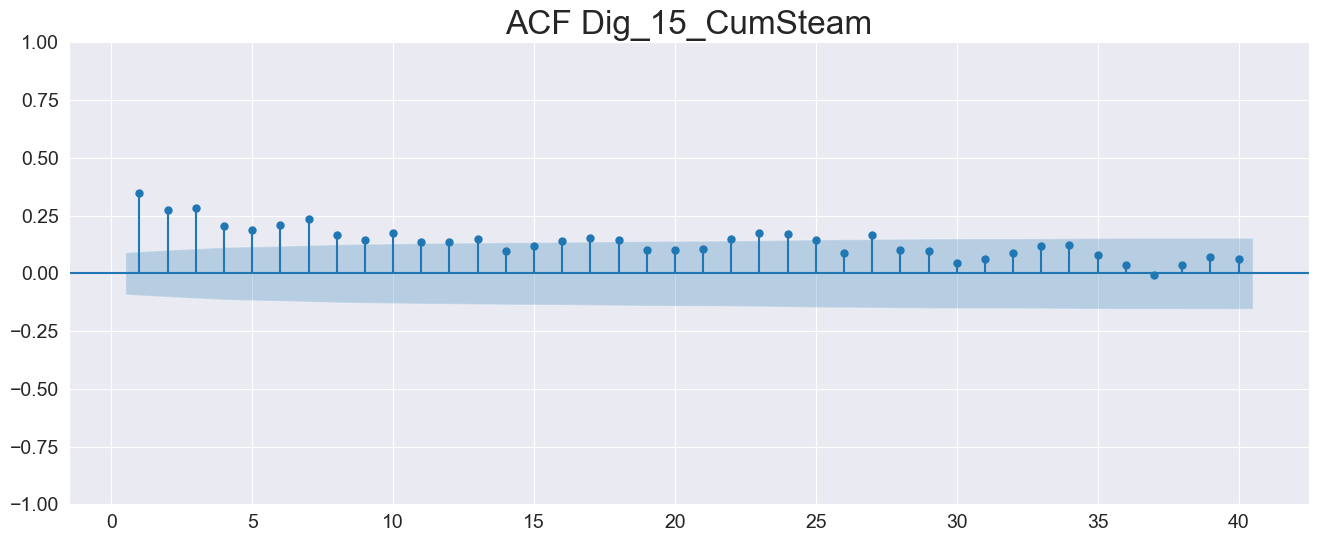

In [139]:
sgt.plot_acf(data15.CUM_Steam, lags = 40, zero = False)
plt.title("ACF Dig_15_CumSteam", size = 24)
plt.show()

### PACF

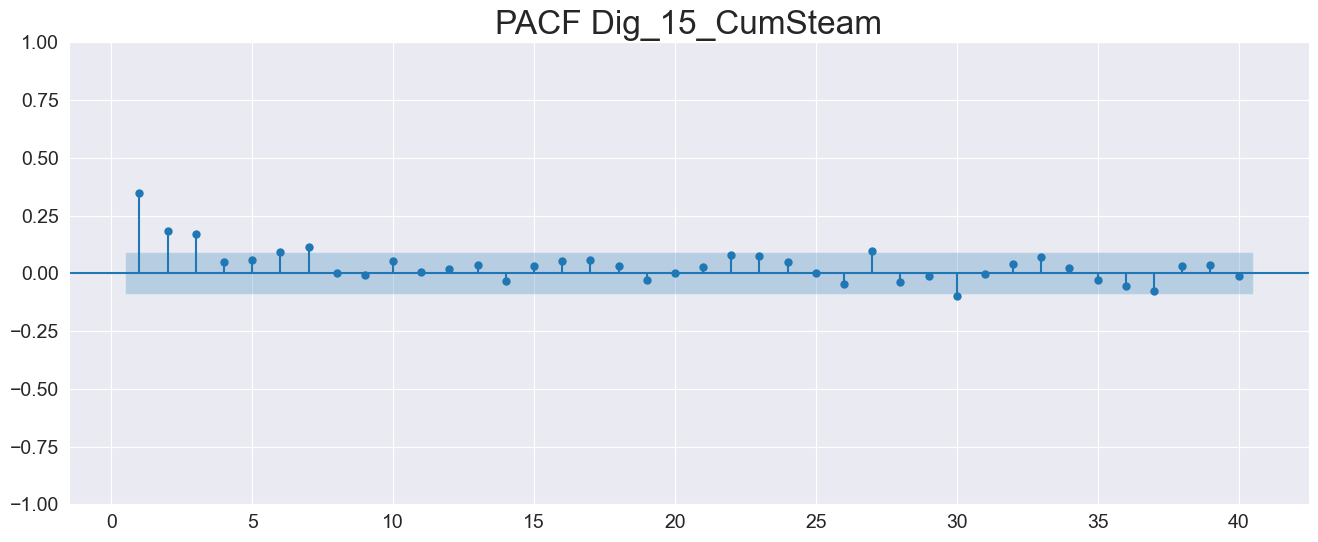

In [140]:
sgt.plot_pacf(data15.CUM_Steam, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Dig_15_CumSteam", size = 24)
plt.show()

### ARIMA Models

In [141]:
model_auto = auto_arima(data15_train.CUM_Steam)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  416
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -942.288
Date:                Mon, 01 Apr 2024   AIC                           1894.577
Time:                        23:42:22   BIC                           1914.718
Sample:                    01-01-2023   HQIC                          1902.541
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1874      0.048      3.898      0.000       0.093       0.282
ar.L2          0.0979      0.045      2.168      0.030       0.009       0.186
ar.L3          0.0879      0.052      1.685      0.092      -0.014       0.190
ma.L1         -0.9726      0.013    -76.845      0.000      -0.997      -0.948
sigma2         5.4636      0.427     12.806      0.000       4.627       6.300
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.17
Prob(Q):                              0.98   Prob(JB):                         0.08
Heteroskedasticity (H):               1.16   Skew:                             0.23
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
model_arima = ARIMA(data15_train.CUM_Steam, order=(3, 1, 1))
results_arima = model_arima.fit()
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:              CUM_Steam   No. Observations:                  416
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -942.288
Date:                Mon, 01 Apr 2024   AIC                           1894.577
Time:                        23:42:22   BIC                           1914.718
Sample:                    01-01-2023   HQIC                          1902.541
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1874      0.048      3.898      0.000       0.093       0.282
ar.L2          0.0979      0.045      2.168      0.030       0.009       0.186
ar.L3          0.0879      0.052      1.685      0.0

### ARIMA311 Training Plots

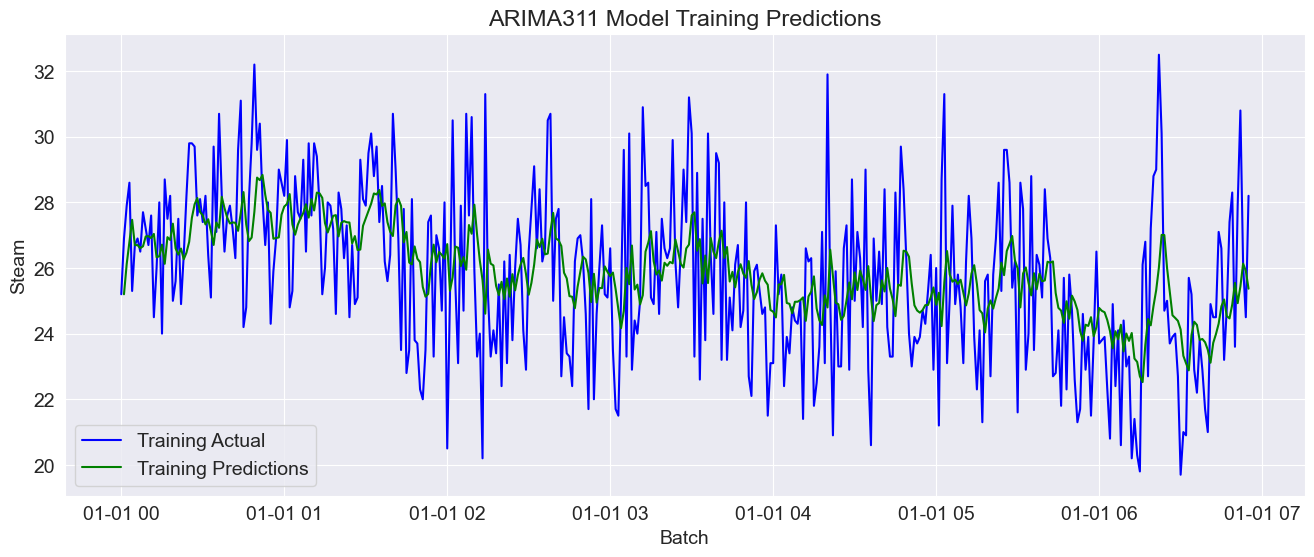

In [143]:
start_date = '2023-01-01 06:56:00'
end_date = '2023-01-01 07:41:00'

# Make predictions on training dataset
train_predictions = pd.DataFrame(results_arima.predict())
#print(train_predictions)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Make predictions on test dataset
test_predictions = pd.DataFrame(results_arima.predict(start=start_date, end=end_date))
#print(test_predictions)

# Plot actual values of training data
plt.plot(data15_train.index, data15_train['CUM_Steam'], color='blue', label='Training Actual')

# Plot predicted values of training data
plt.plot(data15_train.index[1:], train_predictions['predicted_mean'].iloc[1:], color='green', label='Training Predictions')

# Add labels and legend
plt.title('ARIMA311 Model Training Predictions')
plt.xlabel('Batch')
plt.ylabel('Steam')
plt.legend()

# Show plot
plt.show()

### ARIMA311 Training Performance

In [144]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(data15_train['CUM_Steam'], train_predictions['predicted_mean']))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(data15_train['CUM_Steam'], train_predictions['predicted_mean'])

print('rmse', rmse)
print('mae', mae)

rmse 2.643709315953094
mae 1.9705937993128357


### ARIMA311 Test Plots

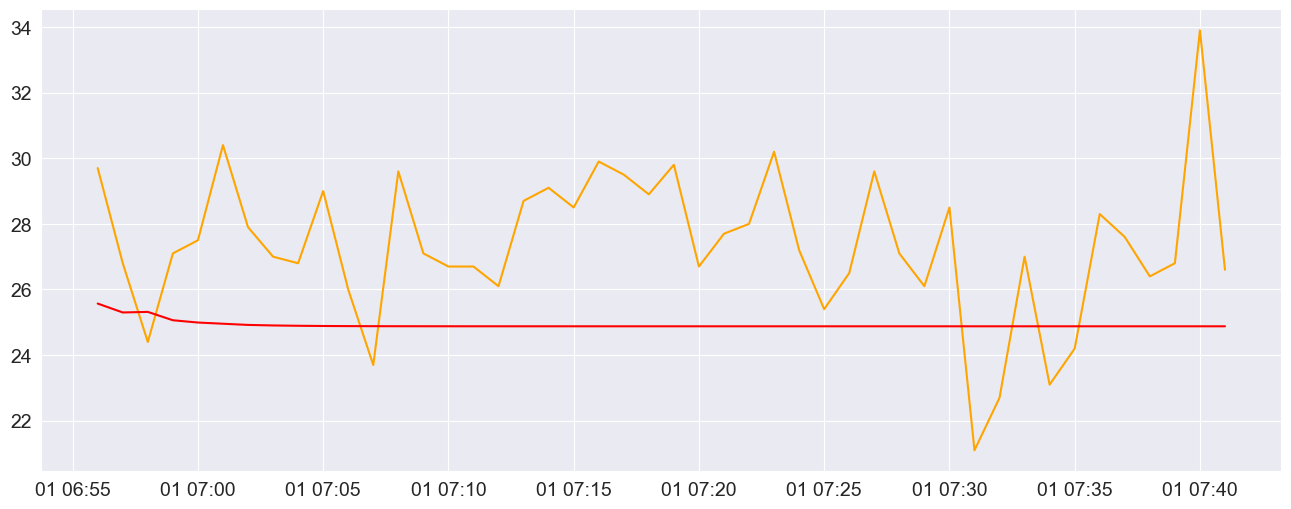

In [145]:
# Plot test data
plt.plot(data15_test.index, data15_test['CUM_Steam'], color='orange', label='Test')

# Plot forecasted values of test data
plt.plot(data15_test.index, test_predictions['predicted_mean'], color='red', label='Forecast')

# Show plot
plt.show()

### ARIMA311 Test Performance

In [146]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(data15_test['CUM_Steam'], test_predictions['predicted_mean']))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(data15_test['CUM_Steam'], test_predictions['predicted_mean'])

print('rmse', rmse)
print('mae', mae)

rmse 3.2987848187181235
mae 2.8734405320323084


### ARIMAX with all Parameters

In [147]:
# Define exogenous variables
exog_vars = data15_train[['Delta', 'Damkohler', 'Sigma']]

# Fit AutoARIMA model with exogenous variables
model_arimax = ARIMA(data15_train['CUM_Steam'], exog=exog_vars, order=(3,1,1)) 
res_arimax = model_arimax.fit()
res_arimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CUM_Steam   No. Observations:                  416
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -778.301
Date:                Mon, 01 Apr 2024   AIC                           1572.602
Time:                        23:42:30   BIC                           1604.828
Sample:                    01-01-2023   HQIC                          1585.345
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Delta         -0.1058      0.041     -2.561      0.010      -0.187      -0.025
Damkohler     -2.2835      0.821     -2.782      0.005      -3.892      -0.675
Sigma         13.3630      0.667     20.040      0.000      12.056      14.670
ar.L1          0.1596      0.053      2.988      0.003       0.055       0.264
ar.L2          0.0882      0.047      1.864      0.062      -0.005       0.181
ar.L3          0.0109      0.051      0.215      0.829      -0.088       0.110
ma.L1         -0.9808      0.010    -93.554      0.000      -1.001      -0.960
sigma2         2.4753      0.187     13.249      0.000       2.109       2.841
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.96   Prob(JB):                         0.66
Heteroskedasticity (H):               0.88   Skew:                             0.09
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMAX311 with all parameters training plots

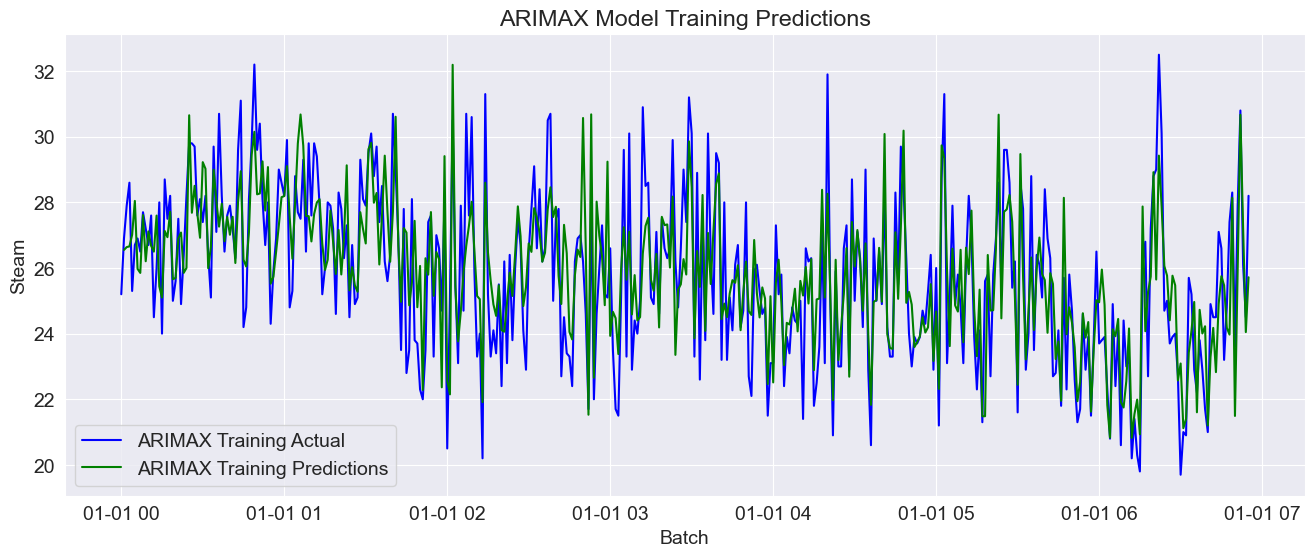

In [148]:
start_date = '2023-01-01 06:56:00'
end_date = '2023-01-01 07:41:00'
exog_vars_test = data15_test[['Delta', 'Damkohler', 'Sigma']]

# Make predictions on training dataset
train_predictions = pd.DataFrame(res_arimax.predict())
#print(train_predictions)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Make predictions on test dataset
arimax_test_predictions = pd.DataFrame(res_arimax.predict(start=start_date, end=end_date, exog=exog_vars_test))
#print(test_predictions)

# Plot actual values of training data
plt.plot(data15_train.index, data15_train['CUM_Steam'], color='blue', label='ARIMAX Training Actual')

# Plot predicted values of training data
plt.plot(data15_train.index[1:], train_predictions['predicted_mean'].iloc[1:], color='green', label='ARIMAX Training Predictions')

# Add labels and legend
plt.title('ARIMAX Model Training Predictions')
plt.xlabel('Batch')
plt.ylabel('Steam')
plt.legend()

# Show plot
plt.show()

### Training Performance

In [149]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(data15_train['CUM_Steam'], train_predictions['predicted_mean']))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(data15_train['CUM_Steam'], train_predictions['predicted_mean'])

print('rmse', rmse)
print('mae', mae)

rmse 1.6899307346388301
mae 1.285006165551478


### ARIMAX test plots

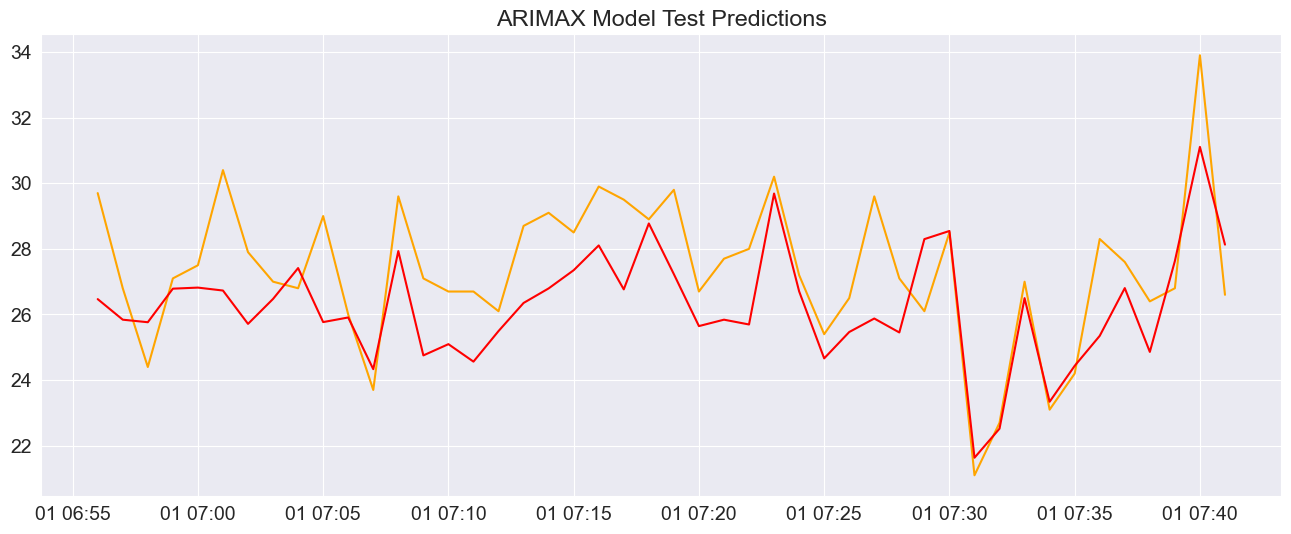

In [150]:
# Plot test data
plt.plot(data15_test.index, data15_test['CUM_Steam'], color='orange', label='Test')

# Plot forecasted values of test data
plt.plot(data15_test.index, arimax_test_predictions['predicted_mean'], color='red', label='Forecast')

# Add labels and legend
plt.title('ARIMAX Model Test Predictions')

# Show plot
plt.show()

In [151]:
# residuals = data15_train['CUM_Steam'] - train_predictions['predicted_mean']

In [152]:
# Create a histogram of residuals
# plt.figure(figsize=(8, 6))
# plt.hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# # Add labels and title
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.title('Histogram of Residuals')

# # Add a grid for better visualization
# plt.grid(True)

# # Show plot
# plt.show()

### Test Performance

In [153]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(data15_test['CUM_Steam'], arimax_test_predictions['predicted_mean']))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(data15_test['CUM_Steam'], arimax_test_predictions['predicted_mean'])

print('rmse', rmse)
print('mae', mae)

rmse 1.7779381536237144
mae 1.448352103707048
